# Data Science Program Online - Week#2

## *Think about using `Numpy`, `Pandas` and any visualization libs (e.g., Matplotlib, Seaborn etc) for all solutions. Always discuss your solutions.*

## `US_Baby_Names` Dataset

Step 1: What are the percentages of male and female in the dataset?

Step 2: How many different names exist in the dataset?

Step 3: What is the name with most occurrences?  Plot histogram of names.

Step 4: Get a summary with the mean, min, max, std and quartiles of names.

## `Online_Retail` Dataset

Step 1: Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

Step 2: Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK

Step 3: Plot a line chart showing revenue (y) per UnitPrice (x).

## `Titanic` Dataset (Week#1 HW)


Step 1. Create a pie chart presenting the male/female proportion

Step 2. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

Step 3. Create a histogram with the Fare payed



## `appl_1980_2014` dataset (Apple Stock Dataset)

Step 1. Load the dataset and transform the Date column as a datetime type

Step 2: Is there any duplicate dates? Then set the date as the index.

Step 3: Get the last business day of each month

Step 4: Plot the 'Adj Close' value. 

### Other Problems

plotly.py is an interactive, open-source, and browser-based graphing library for Python (https://github.com/plotly/plotly.py). Please use plotly for the following questions.

University of Liverpool - Ion Switching is a recent Kaggle competition (https://www.kaggle.com/c/liverpool-ion-switching). In this competition, you will be predicting the number of `open_channels` present, based on electrophysiological signal data.

Work with training data for the following questions. (`train.csv`)


1. Plot `signal` vs `time` for all data.

2. Plot `open_channels` vs `time` for all data.

3. Plot some sample signal snippets (at least 6 in one graph). Each snippet includes 100 time steps.

4. Using any moving average method with window size of your choice, please plot moving average signals over the 3rd question. (if you don't know `moving average`, please see https://en.wikipedia.org/wiki/Moving_average or slack us)

5. Instead of using moving average, please use exponential smoothing with parameters of your choise for question 4 above.

6. The signals are divided into 10 batches with equal size according time. Plot histogram of `open_channel` for each batch.

7. Plot signal mean vs open channels.

8. Plot signal median vs open channels.

## Stock Price API

- Use any Stock Price APIs (you can use this one: https://www.alphavantage.co/)
- Get the stock price of any company of your choice in the last two years (or more)
- Plot price vs time

## Data Structures & Algorithms

------------------------------------------------------------------------------------------------------------------------------


In [0]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import plotly.graph_objs as go

!pip install plotly
!pip install cufflinks

from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
import plotly.express as px
init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## `US_Baby_Names` Dataset

### Step 1: What are the percentages of male and female in the dataset?

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Week2-Dataset/US_Baby_Names_right.csv')
df.drop([df.columns[0], 'Id', 'Year', 'State'], axis=1, inplace = True)

df['Count'] = df['Count'].astype('int16')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
count_male = (df['Gender'] == 'M').sum()
count_female = (df['Gender'] == 'F').sum()

print(f"Male: {count_male}")
print(f"Female: {count_female}")
print('The percentages of male and female in the dataset is {0:.2f}'.format(count_male / count_female))

Male: 457549
Female: 558846
The percentages of male and female in the dataset is 0.82


### Step 2: How many different names exist in the dataset?

In [0]:
def count_names_exist(dataframe):
    different_names_exist = len(set(dataframe['Name']))
    print(different_names_exist)

count_names_exist(df)

print(df)

17632
            Name Gender  Count
0           Emma      F     62
1        Madison      F     48
2         Hannah      F     46
3          Grace      F     44
4          Emily      F     41
...          ...    ...    ...
1016390     Seth      M      5
1016391  Spencer      M      5
1016392     Tyce      M      5
1016393   Victor      M      5
1016394   Waylon      M      5

[1016395 rows x 3 columns]


### Step 3: What is the name with most occurrences?  Plot histogram of names.

The most occurences of the name is Jacob with count equal 242874


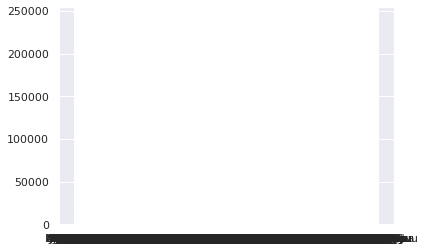

In [0]:
df.drop(['Gender'], axis = 1, inplace=True)

def the_most_occurences(dataframe):
    # Find the most occurences of the names and prepare data to plot histogram of names
    dictionary = {}

    for index, row in dataframe.iterrows():
      name = row['Name']
      count = row['Count']

      dictionary[name] = dictionary.get(name, 0) + count

    the_most_occurences_name = max(dictionary, key=dictionary.get)
    the_most_occurences_count = dictionary[the_most_occurences_name]

    return the_most_occurences_name, the_most_occurences_count, dictionary

the_most_name, the_most_count, dictionary = the_most_occurences(df)
print(f"The most occurences of the name is {the_most_name} with count equal {the_most_count}")
plt.bar(list(dictionary.keys()), dictionary.values(), color='g')
plt.show()  

### Step 4: Get a summary with the mean, min, max, std and quartiles of names.

In [0]:
# Get summary with the mean, min, max, std and quartiles of names.
df_step_4 = pd.DataFrame(dictionary.items(), columns=['Name', 'Count'])

def get_mean_min_max_std_quartiles(dataframe):
  # Calculate
  mean = dataframe['Count'].mean()
  min = dataframe['Count'].min()
  max = dataframe['Count'].max()
  std = dataframe['Count'].std() 
  quartiles = dataframe['Count'].quantile()

  # Print all of values
  print('Mean of Names: {0:.2f}'.format(mean))
  print('Min of Names: {0:.2f}'.format(min))
  print('Max of Names: {0:.2f}'.format(max))
  print('Std of Names: {0:.2f}'.format(std))
  print('Quartile of Names: {0:.2f}'.format(quartiles))

get_mean_min_max_std_quartiles(df_step_4)

Mean of Names: 2008.93
Min of Names: 5.00
Max of Names: 242874.00
Std of Names: 11006.07
Quartile of Names: 49.00


## `Online_Retail` Dataset

### Step 1: Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Week2-Dataset/Online_Retail.csv', encoding= 'unicode_escape')
df1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[541909 rows x 8 columns]

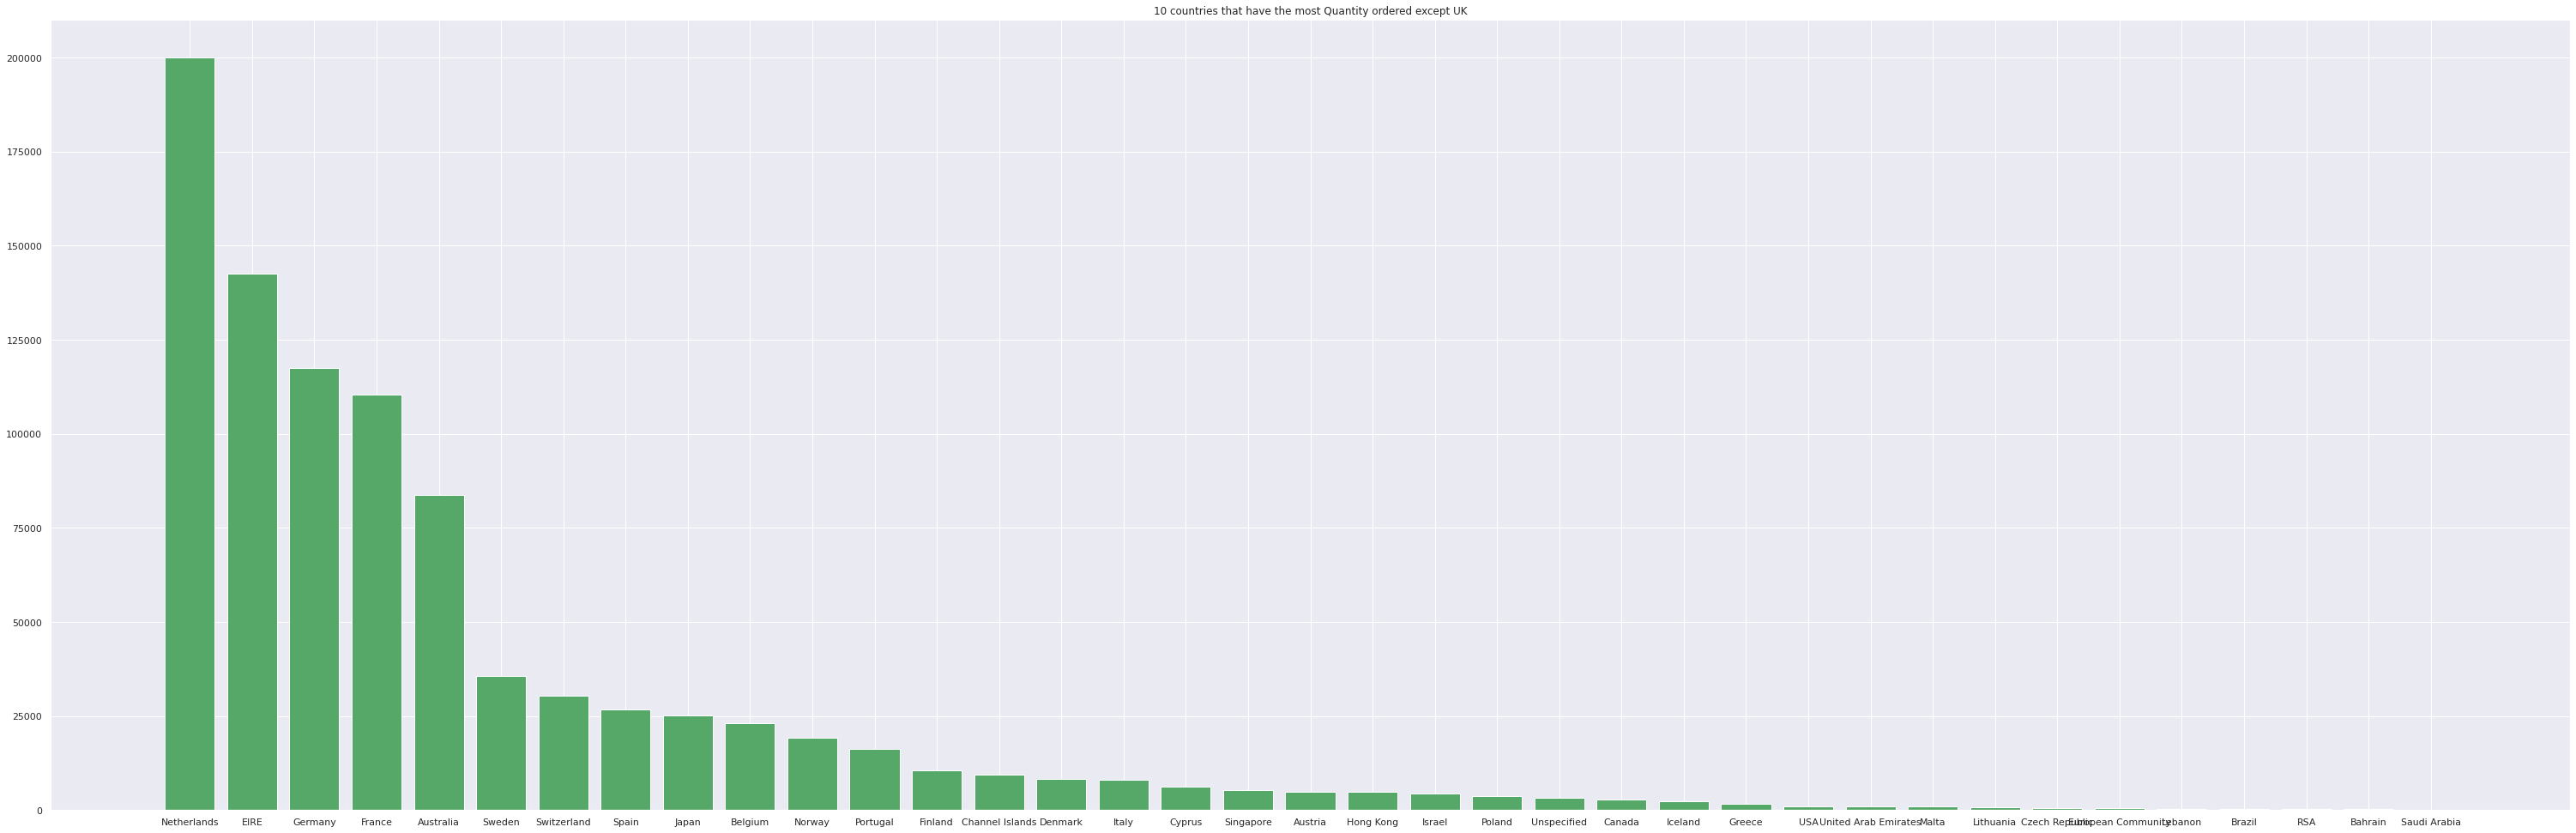

In [0]:
df1_step1 = df1[['Country', 'Quantity']]
df1_step1['Quantity'] = df1_step1['Quantity'].astype('int16')

def top_10_quantity(dataframe):
    # Create dictionary to calculate top 10 countries have the most 'Quantity'
    dictionary = dict()
    names =  df1_step1.Country.unique()
    temp_lst = []
    
    # Calculate quantity of countries except 'UK'
    for name in names:
        if(name == 'United Kingdom'):
            continue
        temp_lst.append([name, df1.query('Country == "{}"'.format(name))['Quantity'].sum()])
  
    sorted_lst = sorted(temp_lst, key=lambda country: country[1], reverse=True)
    return sorted_lst
     

sorted_lst = top_10_quantity(df1_step1)
sorted_lst_name = [name[0] for name in sorted_lst]
sorted_lst_quantity = [quantity[1] for quantity in sorted_lst]

fig = plt.figure(figsize = [40.8, 12.8])
ax = fig.add_axes([1, 1, 1, 1])
ax.bar(sorted_lst_name, sorted_lst_quantity, color='g', width = 0.8)    
plt.title('10 countries that have the most Quantity ordered except UK')
plt.show()

### Step 2: Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [0]:
df1_step2 = df1[['Country', 'Quantity', 'UnitPrice', 'CustomerID']]
df1_step2['Quantity'] = df1_step2['Quantity'].astype('int16')
df1_step2['UnitPrice'] = df1_step2['UnitPrice'].astype('float32')

df1_step2.head(10)

Country  Quantity  UnitPrice  CustomerID
0  United Kingdom         6       2.55     17850.0
1  United Kingdom         6       3.39     17850.0
2  United Kingdom         8       2.75     17850.0
3  United Kingdom         6       3.39     17850.0
4  United Kingdom         6       3.39     17850.0
5  United Kingdom         2       7.65     17850.0
6  United Kingdom         6       4.25     17850.0
7  United Kingdom         6       1.85     17850.0
8  United Kingdom         6       1.85     17850.0
9  United Kingdom        32       1.69     13047.0

Netherlands


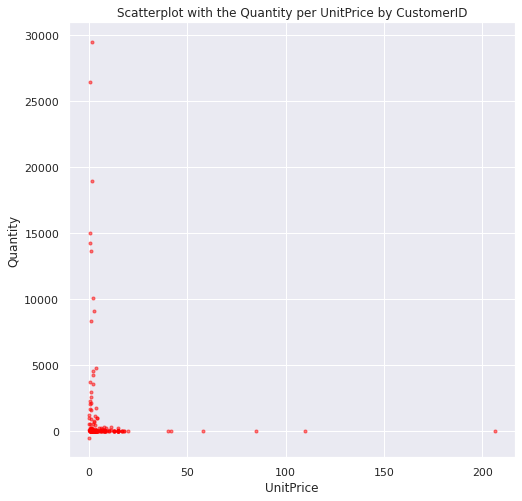

EIRE


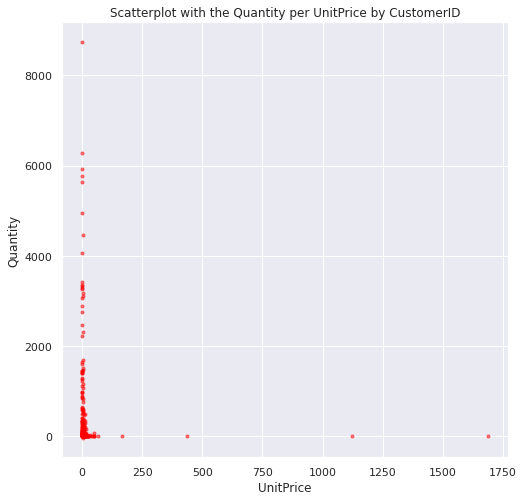

Germany


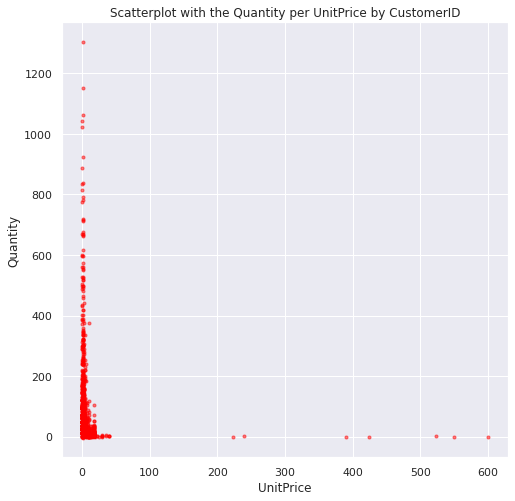

In [0]:
def scatterplot(name_country):
  data_df = df1_step2.groupby(['UnitPrice', 'CustomerID', 'Country'])['Quantity'].sum().to_frame()

  x_unit_price = []
  y_quantity = []

  for index, row in data_df.iterrows():
    if(index[2] == name_country):
      x_unit_price.append(index[0])
      y_quantity.append(row['Quantity'])
  
  area = np.pi * 3

  plt.figure(figsize=(8, 8))
  plt.scatter(x_unit_price, y_quantity, s=area, c='red', alpha=0.5)
  plt.title('Scatterplot with the Quantity per UnitPrice by CustomerID')
  plt.xlabel('UnitPrice')
  plt.ylabel('Quantity')
  plt.show()

print(sorted_lst_name[0])
scatterplot(sorted_lst_name[0])

print(sorted_lst_name[1])
scatterplot(sorted_lst_name[1])

print(sorted_lst_name[2])
scatterplot(sorted_lst_name[2])

### Step 3: Plot a line chart showing revenue (y) per UnitPrice (x).

In [0]:
df1_step3 = df1.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country'], axis = 1)
df1_step3

Quantity  UnitPrice
0              6       2.55
1              6       3.39
2              8       2.75
3              6       3.39
4              6       3.39
...          ...        ...
541904        12       0.85
541905         6       2.10
541906         4       4.15
541907         4       4.15
541908         3       4.95

[541909 rows x 2 columns]

In [0]:
df1_step3 = df1_step3.groupby('UnitPrice')['Quantity'].sum().to_frame().reset_index(level=['UnitPrice'])
df1_step3['Revenue'] = df1_step3.UnitPrice * df1_step3.Quantity
df1_step3

UnitPrice  Quantity    Revenue
0    -11062.060         2 -22124.120
1         0.000   -134354     -0.000
2         0.001         4      0.004
3         0.010      -720     -7.200
4         0.030     -9720   -291.600
...         ...       ...        ...
1625  13541.330        -1 -13541.330
1626  16453.710        -1 -16453.710
1627  16888.020        -1 -16888.020
1628  17836.460        -1 -17836.460
1629  38970.000        -1 -38970.000

[1630 rows x 3 columns]

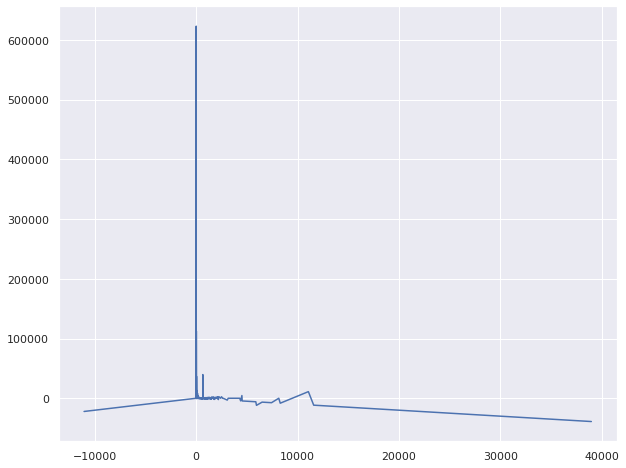

In [0]:
x = df1_step3['UnitPrice']
y = df1_step3['Revenue']
plt.figure(figsize=(10, 8))

plt.plot(x, y)
plt.show()

## `Titanic` Dataset (Week#1 HW)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Week2-Dataset/test.csv', encoding= 'unicode_escape')
df2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]

Step 1. Create a pie chart presenting the male/female proportion

In [0]:
df2_step1 = df2.drop(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
df2_step1

Sex
0      male
1    female
2      male
3      male
4    female
..      ...
413    male
414  female
415    male
416    male
417    male

[418 rows x 1 columns]

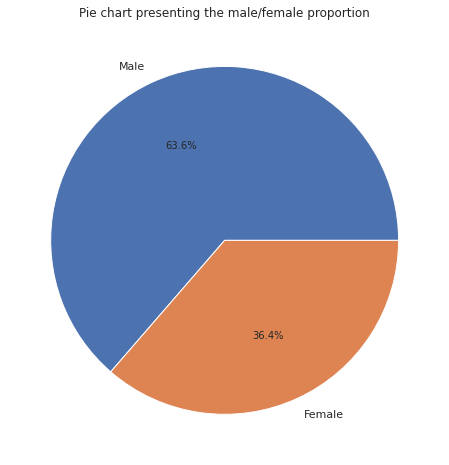

In [0]:
count_male = (df2_step1['Sex'] == 'male').sum()
count_female = (df2_step1['Sex'] == 'female').sum()

proportion = [count_male, count_female]
my_labels = 'Male', 'Female'

plt.figure(figsize=(8, 8))
plt.pie(proportion, labels = my_labels, autopct='%1.1f%%')
plt.title('Pie chart presenting the male/female proportion')
plt.show()

Step 2. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

In [0]:
df2_step2 = df2.drop(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df2_step2

Sex   Age      Fare
0      male  34.5    7.8292
1    female  47.0    7.0000
2      male  62.0    9.6875
3      male  27.0    8.6625
4    female  22.0   12.2875
..      ...   ...       ...
413    male   NaN    8.0500
414  female  39.0  108.9000
415    male  38.5    7.2500
416    male   NaN    8.0500
417    male   NaN   22.3583

[418 rows x 3 columns]

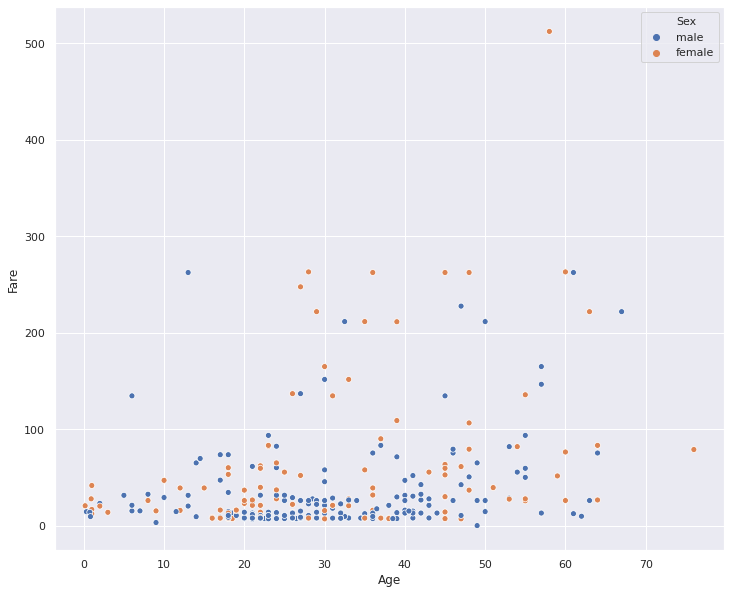

In [0]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df2_step2)

Step 3. Create a histogram with the Fare payed

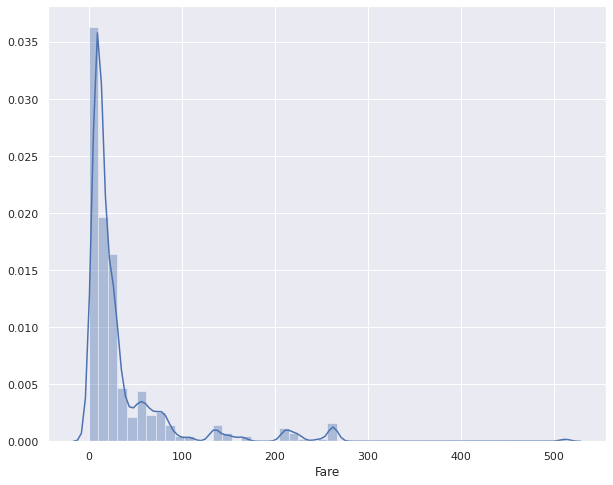

In [0]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(df2['Fare'])

## `appl_1980_2014` dataset (Apple Stock Dataset)

Step 1. Load the dataset and transform the Date column as a datetime type

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Week2-Dataset/appl_1980_2014.csv')
df3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Date   Open   High    Low  Close     Volume  Adj Close
0     2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
1     2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2     2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
3     2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
4     2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...          ...    ...    ...    ...    ...        ...        ...
8460  1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
8461  1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
8462  1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
8463  1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
8464  1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 7 columns]

In [0]:
df3['Date']= pd.to_datetime(df3['Date'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


Step 2: Is there any duplicate dates? Then set the date as the index.

In [0]:
duplicate_date = df3['Date'].duplicated().any()
duplicate_date

False

In [0]:
df3.set_index('Date')

Open   High    Low  Close     Volume  Adj Close
Date                                                        
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...           ...    ...    ...    ...        ...        ...
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 6 columns]

Step 3: Get the last business day of each month

In [0]:
df3['Date'] = pd.to_datetime(df3['Date'])

df3_last_day = df3.loc[df3.Date.isin(df3.Date + pd.offsets.BMonthEnd(1))]
df3_last_day

Date    Open    High     Low   Close     Volume  Adj Close
5    2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93
26   2014-05-30  637.98  644.17  628.90  633.00  141005200      90.43
47   2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83
68   2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25
89   2014-02-28  529.08  532.75  522.12  526.24   92992200      74.76
...         ...     ...     ...     ...     ...        ...        ...
8369 1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44
8390 1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38
8412 1981-02-27   26.50   26.75   26.50   26.50    3690400       0.41
8431 1981-01-30   28.50   28.50   28.25   28.25   11547200       0.44
8452 1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53

[395 rows x 7 columns]

Step 4: Plot the 'Adj Close' value. 

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df3['Date'], y=df3['Adj Close']))

### Other Problems

plotly.py is an interactive, open-source, and browser-based graphing library for Python (https://github.com/plotly/plotly.py). Please use plotly for the following questions.

University of Liverpool - Ion Switching is a recent Kaggle competition (https://www.kaggle.com/c/liverpool-ion-switching). In this competition, you will be predicting the number of `open_channels` present, based on electrophysiological signal data.

Work with training data for the following questions. (`train.csv`)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Week2-Dataset/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df4['time'] = df4['time'].astype('float32')
df4['signal'] = df4['signal'].astype('float32')
df4['open_channels'] = df4['open_channels'].astype('int16')

1. Plot `signal` vs `time` for all data.

In [0]:
df4_step1 = df4.drop(['open_channels'], axis = 1)
df4_step1['time'] = df4_step1['time'].astype('float32')
df4_step1['signal'] = df4_step1['signal'].astype('float32')

df4_step1

time  signal
0          0.000100 -2.7600
1          0.000200 -2.8557
2          0.000300 -2.4074
3          0.000400 -3.1404
4          0.000500 -3.1525
...             ...     ...
1048570  104.857101 -2.4535
1048571  104.857201 -2.8087
1048572  104.857300 -2.8070
1048573  104.857399 -1.5955
1048574  104.857498 -1.4665

[1048575 rows x 2 columns]

In [0]:
fig = go.Figure(go.Scatter(x = df4_step1['signal'], y = df4_step1['time'],
                  name='Signal vs Time for all data'))

fig.update_layout(title='Signal vs Time for all data',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)

fig.show()

2. Plot `open_channels` vs `time` for all data.

3. Plot some sample signal snippets (at least 6 in one graph). Each snippet includes 100 time steps.

4. Using any moving average method with window size of your choice, please plot moving average signals over the 3rd question. (if you don't know `moving average`, please see https://en.wikipedia.org/wiki/Moving_average or slack us)

5. Instead of using moving average, please use exponential smoothing with parameters of your choise for question 4 above.

6. The signals are divided into 10 batches with equal size according time. Plot histogram of `open_channel` for each batch.

7. Plot signal mean vs open channels.

8. Plot signal median vs open channels.